### Resource: csv files

In [6]:
import os
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from random import shuffle
from tqdm import tqdm
import pandas as pd
import pickle
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier,ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler

#from scipy.misc import imread, imresize

%matplotlib inline

### 1. Bar charts for Facial emotion estimation
here only provide sample code for different visulazation

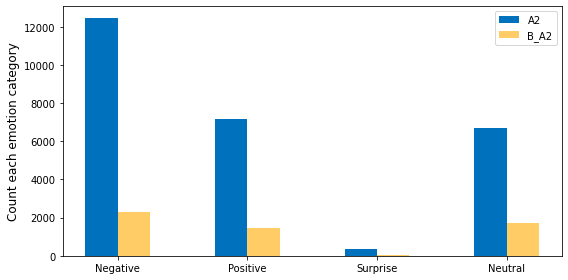

In [2]:
# with two conditions

colors = {'Condition A':'blue', 'Condition B':'light green'}
labels = ['Negative', 'Positive', 'Surprise', 'Neutral']
#part2 A2 sample1
# A = [2584,1497,1371,71]

#part2 A2 sample2
A = [12445,7173,331, 6682]
B = [2310,1431,50, 1732]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 4))
rects1 = ax.bar(x, A, width, label='A2',color="#0072BD")
rects2 = ax.bar(x+width, B, width, label='B_A2',color="#FFCC66")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count each emotion category',fontsize=12)
#ax.set_title('4 Facial Emotion Categories Estimation with Condtion A2 and Condtion B', fontsize=14)
ax.set_xticks(x+width/2)
ax.set_xticklabels(labels)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.savefig('emotionEst_4categries_HRI_part2_A2.jpg',bbox_inches='tight')
plt.show()

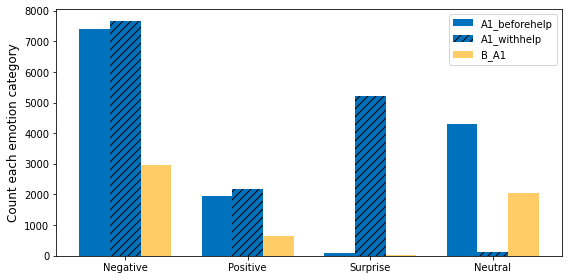

In [3]:
# with three conditions

import matplotlib.pyplot as plt
import numpy as np

colors = {'Condition A':'blue', 'Condition B':'light green'}
labels = ['Negative', 'Positive', 'Surprise', 'Neutral']

A = [7401, 1961, 81, 4299]
B = [7667, 2192, 5201, 136]
C = [2974, 646, 35, 2040]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 4))

# #136eaa
rects1 = ax.bar(x, A, width, label='A1_beforehelp', color= "#0072BD")
rects2 = ax.bar(x + width, B, width, label='A1_withhelp', color= "#0072BD",hatch='///')
rects3 = ax.bar(x + width*2 , C, width, label='B_A1', color="#FFCC66")


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count each emotion category', fontsize=12)
#ax.set_title('4 Facial Emotion Categories Estimation with Condition A1 and Condition B',fontsize=14)
ax.set_xticks(x+width)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.savefig('emotionEst_4categries_HRI_part2_A1.jpg',bbox_inches='tight')
plt.show()

### 2. Boxplot for numerical results, for example, emotion scores, eyegazing (pitch, yaw and angle), silence duration time, etc.

In [10]:
eyegaze_A1_beforehelp_df = pd.read_csv('/home/nali/Develop/HRI/data/HRI_Study2_result_csv/eye_gazing/part2/part2_A1_beforehelp_eyegaze_11935_norm.csv')
eyegaze_A1_withhelp_df = pd.read_csv('/home/nali/Develop/HRI/data/HRI_Study2_result_csv/eye_gazing/part2/part2_A1_help_eyegaze_12938_norm.csv')
eyegaze_B_A1_df =  pd.read_csv('/home/nali/Develop/HRI/data/HRI_Study2_result_csv/eye_gazing/part2/part2_A1_B_eyegaze_4914_norm.csv')
eyegaze_A2_df = pd.read_csv('/home/nali/Develop/HRI/data/HRI_Study2_result_csv/eye_gazing/part2/part2_A2_eyegaze_norm_22077.csv')
eyegaze_B_A2_df = pd.read_csv('/home/nali/Develop/HRI/data/HRI_Study2_result_csv/eye_gazing/part2/part2_A2_B_eyegaze_norm_4661.csv')

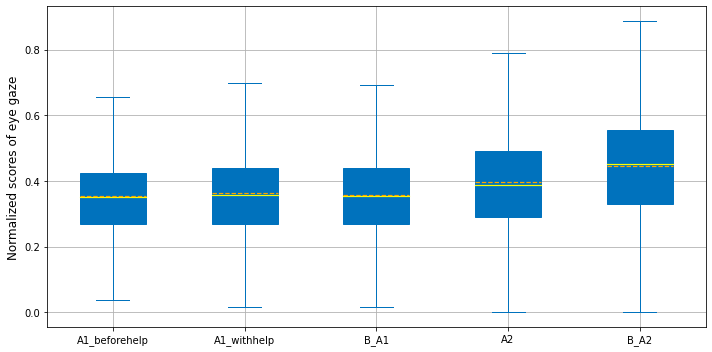

In [11]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True
labels = ['A1_beforehelp', 'A1_withhelp', 'B_A1', 'A2', 'B_A2']
medianprops = dict(linestyle='-', linewidth=1.2, color='yellow')
meanpointprops = dict(linestyle='--', linewidth=1.2, color='orange')

data = pd.DataFrame({
    "A1_beforehelp": eyegaze_A1_beforehelp_df['norm_pitchyaw'], 
    "A1_withhelp": eyegaze_A1_withhelp_df['norm_pitchyaw'], 
    "B_A1": eyegaze_B_A1_df['norm_pitchyaw'],
    "A2": eyegaze_A2_df['norm_pitchyaw'],
    "B_A2": eyegaze_B_A2_df['norm_pitchyaw']
})

# ax = data[['A1_beforehelp', 'A1_withhelp', 'A1_B']].plot(kind='box', title='Four Emotions in A1')

ax = data[['A1_beforehelp','A1_withhelp', 'B_A1', 'A2', 'B_A2']].boxplot(vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color,
                     medianprops=medianprops,
                     meanprops=meanpointprops,
                     labels=labels,
                     showfliers=False,
                     showmeans=True,
                     meanline = True,
                                                                
                     color= "#0072BD"
        )  # will be used to label x-ticks

ax.yaxis.grid(True)
# ax.set_ylabel('Normalised scores of eye gaze', fontsize= 12)
ax.set_ylabel('Normalized scores of eye gaze', fontsize= 12)
#plt.title('Eye Gaze Estimation', fontsize=14)
plt.savefig('Eye_gaze_estimation_full.jpg')
plt.show()

### Mutiple boxplots 

In [14]:
rootpath = '/home/nali/Develop/HRI/data/HRI_Study2_result_csv/facial_Emotion/part2/withuserid/'
model = 'MobileNet'

In [15]:
emotion_df_part2_A1_beforehelp = pd.read_csv(rootpath+model+'/part2_A1_beforehelp_facialEmotion_score_userid_2.csv')
emotion_df_part2_A1_withhelp=pd.read_csv(rootpath+model+'/part2_A1_withhelp_facialEmotion_score_userid_2.csv')
emotion_df_part2_B_A1=pd.read_csv(rootpath+model+'/part2_B_A1_facialEmotion_score_userid_2.csv')
emotion_df_part2_A2=pd.read_csv(rootpath+model+'/part2_A2_facialEmotion_score_userid_2.csv')
emotion_df_part2_B_A2=pd.read_csv(rootpath+model+'/part2_B_A2_facialEmotion_score_userid_2.csv')

In [16]:
data_happy= pd.DataFrame({
    "A1_beforehelp": emotion_df_part2_A1_beforehelp.loc[emotion_df_part2_A1_beforehelp['emotion']==3]['score'], 
    "A1_withhelp":  emotion_df_part2_A1_withhelp.loc[emotion_df_part2_A1_withhelp['emotion']==3]['score'],
    "B_A1":  emotion_df_part2_B_A1.loc[emotion_df_part2_B_A1['emotion']==3]['score'],
    "A2": emotion_df_part2_A2.loc[emotion_df_part2_A2['emotion']==3]['score'],
    "B_A2": emotion_df_part2_B_A2.loc[emotion_df_part2_B_A2['emotion']==3]['score']
})

In [17]:
data_neutral= pd.DataFrame({
    "A1_beforehelp": emotion_df_part2_A1_beforehelp.loc[emotion_df_part2_A1_beforehelp['emotion']==4]['score'], 
    "A1_withhelp":  emotion_df_part2_A1_withhelp.loc[emotion_df_part2_A1_withhelp['emotion']==4]['score'],
    "B_A1":  emotion_df_part2_B_A1.loc[emotion_df_part2_B_A1['emotion']==4]['score'],
    "A2": emotion_df_part2_A2.loc[emotion_df_part2_A2['emotion']==4]['score'],
    "B_A2": emotion_df_part2_B_A2.loc[emotion_df_part2_B_A2['emotion']==4]['score']
})

In [18]:
data_surprise= pd.DataFrame({
    "A1_beforehelp": emotion_df_part2_A1_beforehelp.loc[emotion_df_part2_A1_beforehelp['emotion']==6]['score'], 
    "A1_withhelp":  emotion_df_part2_A1_withhelp.loc[emotion_df_part2_A1_withhelp['emotion']==6]['score'],
    "B_A1":  emotion_df_part2_B_A1.loc[emotion_df_part2_B_A1['emotion']==6]['score'],
    "A2": emotion_df_part2_A2.loc[emotion_df_part2_A2['emotion']==6]['score'],
    "B_A2": emotion_df_part2_B_A2.loc[emotion_df_part2_B_A2['emotion']==6]['score']
})

In [19]:
data_sad= pd.DataFrame({
    "A1_beforehelp": emotion_df_part2_A1_beforehelp.loc[emotion_df_part2_A1_beforehelp['emotion']==5]['score'], 
    "A1_withhelp":  emotion_df_part2_A1_withhelp.loc[emotion_df_part2_A1_withhelp['emotion']==5]['score'],
    "B_A1":  emotion_df_part2_B_A1.loc[emotion_df_part2_B_A1['emotion']==5]['score'],
    "A2": emotion_df_part2_A2.loc[emotion_df_part2_A2['emotion']==5]['score'],
    "B_A2": emotion_df_part2_B_A2.loc[emotion_df_part2_B_A2['emotion']==5]['score']
})

In [20]:
from matplotlib.patches import Polygon

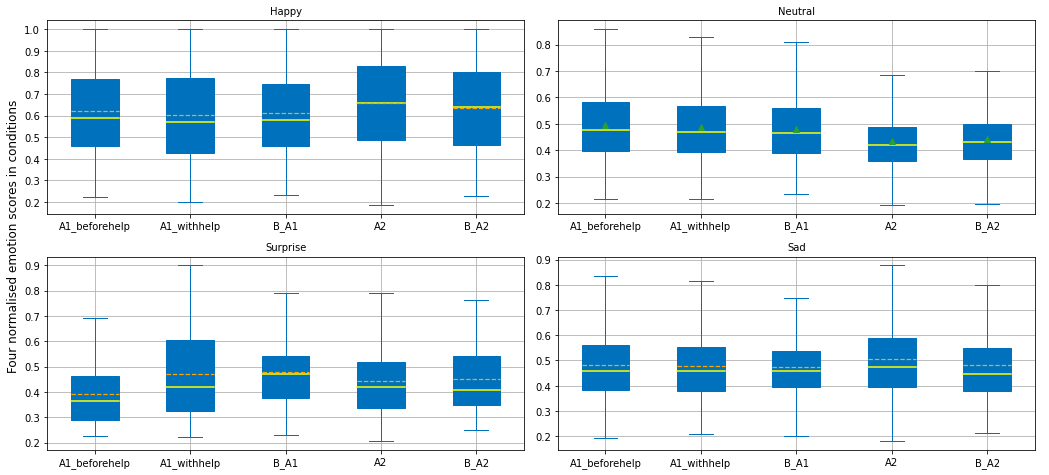

In [21]:
medianprops = dict(linestyle='-', linewidth=1.5, color='yellow')
meanprops = dict(linestyle='--', linewidth=1.2, color='orange')

fig, axe = plt.subplots(2, 2, figsize=(15, 7))
labels = ['A1_beforehelp', 'A1_withhelp', 'B_A1', 'A2', 'B_A2']

data_happy.boxplot(['A1_beforehelp','A1_withhelp', 'B_A1', 'A2', 'B_A2'], ax=axe[0,0],
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color,
                     medianprops=medianprops,
                     meanprops=meanprops,
                     labels=labels, # will be used to label x-ticks
                     color = "#0072BD",
                     showmeans=True,
                     meanline=True,
                     showfliers=False)
axe[0,0].set_title('Happy',fontsize=10)

data_neutral.boxplot(['A1_beforehelp','A1_withhelp', 'B_A1', 'A2', 'B_A2'], ax=axe[0,1],
                    vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color,
                     medianprops=medianprops,
                     meanprops=meanprops,
                     labels=labels, # will be used to label x-ticks
                     color = "#0072BD",
                     showmeans=True,
                     showfliers=False)
axe[0,1].set_title('Neutral',fontsize=10)

data_surprise.boxplot(['A1_beforehelp','A1_withhelp', 'B_A1', 'A2', 'B_A2'], ax=axe[1,0],
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color,
                     medianprops=medianprops,
                     meanprops=meanprops,
                     labels=labels, # will be used to label x-ticks
                     color = "#0072BD",
                     showmeans=True,
                     meanline=True,
                     showfliers=False)
axe[1,0].set_title('Surprise',fontsize=10)


data_sad.boxplot(['A1_beforehelp','A1_withhelp', 'B_A1', 'A2', 'B_A2'], ax=axe[1,1],
                    vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color,
                     medianprops=medianprops,
                     meanprops=meanprops,
                     labels=labels, # will be used to label x-ticks
                     color = "#0072BD",
                     showmeans=True,
                     meanline=True,
                     showfliers=False)
axe[1,1].set_title('Sad',fontsize=10)

fig.add_subplot(111, frameon=False)

plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
# plt.xlabel("Experiment Conditions")
plt.ylabel('Four normalised emotion scores in conditions', fontsize=12)
plt.savefig('Four_emotions_score_in_conditions_boxplot.jpg')
plt.show()

In [ ]:
df_countEmotionByUser_A1_beforehelp = df_emotion_frame_A1_beforehelp.groupby(['user_id','emotion'])['emotion'].aggregate('count')
df_countEmotionByUser_A1_withhelp = df_emotion_frame_A1_withhelp.groupby(['user_id','emotion'])['emotion'].aggregate('count')
df_countEmotionByUser_B_A1 = df_emotion_frame_B_A1.groupby(['user_id','emotion'])['emotion'].aggregate('count')
df_countEmotionByUser_A2 = df_emotion_frame_A2.groupby(['user_id','emotion'])['emotion'].aggregate('count')
df_countEmotionByUser_B_A2 = df_emotion_frame_B_A2.groupby(['user_id','emotion'])['emotion'].aggregate('count')

In [22]:
df_countEmotionByUser_A1_beforehelp = pd.read_csv(rootpath+model+ '/count_emotion_A1_beforehelp.csv')
df_countEmotionByUser_A1_withhelp = pd.read_csv(rootpath+model+ '/count_emotion_A1_withhelp.csv')
df_countEmotionByUser_B_A1 = pd.read_csv(rootpath+model+ '/count_emotion_B_A1.csv')
df_countEmotionByUser_A2 = pd.read_csv(rootpath+model+ '/count_emotion_A2.csv')
df_countEmotionByUser_B_A2 = pd.read_csv(rootpath+model+ '/count_emotion_B_A2.csv')

In [23]:
data_plot_A1_before = pd.DataFrame({
    "angry": df_countEmotionByUser_A1_beforehelp.loc[df_countEmotionByUser_A1_beforehelp['emotion_index']==0]['emotion_count'], 
    # "disgust":  df_countEmotionByUser_A1_beforehelp.loc[df_countEmotionByUser_A1_beforehelp['emotion_index']==1]['emotion_count'],
    # "fear":  df_countEmotionByUser_A1_beforehelp.loc[df_countEmotionByUser_A1_beforehelp['emotion_index']==2]['emotion_count'],
    "happy":  df_countEmotionByUser_A1_beforehelp.loc[df_countEmotionByUser_A1_beforehelp['emotion_index']==3]['emotion_count'],
    "neutral":  df_countEmotionByUser_A1_beforehelp.loc[df_countEmotionByUser_A1_beforehelp['emotion_index']==4]['emotion_count'],
    "sad":  df_countEmotionByUser_A1_beforehelp.loc[df_countEmotionByUser_A1_beforehelp['emotion_index']==5]['emotion_count'],
    "surprise":  df_countEmotionByUser_A1_beforehelp.loc[df_countEmotionByUser_A1_beforehelp['emotion_index']==6]['emotion_count']
}).assign(condition='1.A1_beforehelp')

In [24]:
data_plot_A1_with = pd.DataFrame({
    "angry": df_countEmotionByUser_A1_withhelp.loc[df_countEmotionByUser_A1_withhelp['emotion_index']==0]['emotion_count'], 
    # "disgust":  df_countEmotionByUser_A1_withhelp.loc[df_countEmotionByUser_A1_withhelp['emotion_index']==1]['emotion_count'],
    # "fear":  df_countEmotionByUser_A1_withhelp.loc[df_countEmotionByUser_A1_withhelp['emotion_index']==2]['emotion_count'],
    "happy":  df_countEmotionByUser_A1_withhelp.loc[df_countEmotionByUser_A1_withhelp['emotion_index']==3]['emotion_count'],
    "neutral":  df_countEmotionByUser_A1_withhelp.loc[df_countEmotionByUser_A1_withhelp['emotion_index']==4]['emotion_count'],
    "sad":  df_countEmotionByUser_A1_withhelp.loc[df_countEmotionByUser_A1_withhelp['emotion_index']==5]['emotion_count'],
    "surprise":  df_countEmotionByUser_A1_withhelp.loc[df_countEmotionByUser_A1_withhelp['emotion_index']==6]['emotion_count']
}).assign(condition='2.A1_withhelp')

In [25]:
data_plot_B_A1 = pd.DataFrame({
    "angry": df_countEmotionByUser_B_A1.loc[df_countEmotionByUser_B_A1['emotion_index']==0]['emotion_count'], 
    # "disgust":  df_countEmotionByUser_B_A1.loc[df_countEmotionByUser_B_A1['emotion_index']==1]['emotion_count'],
    # "fear":  df_countEmotionByUser_B_A1.loc[df_countEmotionByUser_B_A1['emotion_index']==2]['emotion_count'],
    "happy":  df_countEmotionByUser_B_A1.loc[df_countEmotionByUser_B_A1['emotion_index']==3]['emotion_count'],
    "neutral":  df_countEmotionByUser_B_A1.loc[df_countEmotionByUser_B_A1['emotion_index']==4]['emotion_count'],
    "sad":  df_countEmotionByUser_B_A1.loc[df_countEmotionByUser_B_A1['emotion_index']==5]['emotion_count'],
    "surprise":  df_countEmotionByUser_B_A1.loc[df_countEmotionByUser_B_A1['emotion_index']==6]['emotion_count']
}).assign(condition='3.B_A1')

In [26]:
data_plot_B_A2 = pd.DataFrame({
    "angry": df_countEmotionByUser_B_A2.loc[df_countEmotionByUser_B_A2['emotion_index']==0]['emotion_count'], 
    # "disgust":  df_countEmotionByUser_B_A2.loc[df_countEmotionByUser_B_A2['emotion_index']==1]['emotion_count'],
    # "fear":  df_countEmotionByUser_B_A2.loc[df_countEmotionByUser_B_A2['emotion_index']==2]['emotion_count'],
    "happy":  df_countEmotionByUser_B_A2.loc[df_countEmotionByUser_B_A2['emotion_index']==3]['emotion_count'],
    "neutral":  df_countEmotionByUser_B_A2.loc[df_countEmotionByUser_B_A2['emotion_index']==4]['emotion_count'],
    "sad":  df_countEmotionByUser_B_A2.loc[df_countEmotionByUser_B_A2['emotion_index']==5]['emotion_count'],
    "surprise":  df_countEmotionByUser_B_A2.loc[df_countEmotionByUser_B_A2['emotion_index']==6]['emotion_count']
}).assign(condition='5.B_A2')

In [27]:
data_plot_A2 = pd.DataFrame({
    "angry": df_countEmotionByUser_A2.loc[df_countEmotionByUser_A2['emotion_index']==0]['emotion_count'], 
    # "disgust":  df_countEmotionByUser_A2.loc[df_countEmotionByUser_A2['emotion_index']==1]['emotion_count'],
    # "fear":  df_countEmotionByUser_A2.loc[df_countEmotionByUser_A2['emotion_index']==2]['emotion_count'],
    "happy":  df_countEmotionByUser_A2.loc[df_countEmotionByUser_A2['emotion_index']==3]['emotion_count'],
    "neutral":  df_countEmotionByUser_A2.loc[df_countEmotionByUser_A2['emotion_index']==4]['emotion_count'],
    "sad":  df_countEmotionByUser_A2.loc[df_countEmotionByUser_A2['emotion_index']==5]['emotion_count'],
    "surprise":  df_countEmotionByUser_A2.loc[df_countEmotionByUser_A2['emotion_index']==6]['emotion_count']
}).assign(condition='4.A2')

In [28]:
datasets = pd.concat([data_plot_A1_before,data_plot_A1_with,data_plot_B_A1,data_plot_A2,data_plot_B_A2])

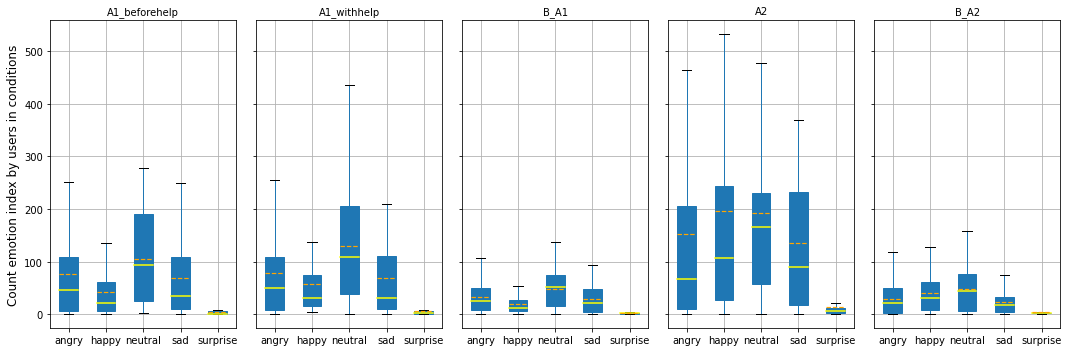

In [29]:
plt.rcParams["figure.figsize"] = [15, 5]
plt.rcParams["figure.autolayout"] = True

# fig = plt.figure(figsize=(8,6))
# ax = fig.gca()

labels = ["Angry", "Happy", "Neutral", "Sad", "Surprise"]
# labels = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]
medianprops = dict(linestyle='-', linewidth=1.5, color='yellow')
meanprops = dict(linestyle='--', linewidth=1.2, color='orange')

# .boxplot(by='Type', figsize=(8, 6), layout=(1, 2), sharey=False)
ax = datasets.groupby('condition').boxplot(layout=(1,5), 
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color,
                     medianprops=medianprops,
                     meanprops=meanprops,
                     labels=labels,
                     fontsize = 10,
                     showfliers=False,
                     showmeans=True,
                     meanline=True
        )  # will be used to label x-ticks


# ax[0].yaxis.grid(True)
# ax[0].set_xlabel(fontsize=10)
ax[0].set_ylabel("Count emotion index by users in conditions",  fontsize=12)
#plt.title('Speech Emotion Analysis', fontsize=14)
ax[0].set_title('A1_beforehelp',fontsize=10)
ax[1].set_title('A1_withhelp',fontsize=10)
ax[2].set_title('B_A1',fontsize=10)
ax[3].set_title('A2',fontsize=10)
ax[4].set_title('B_A2',fontsize=10)

plt.tight_layout() 
plt.savefig('count_emotion_index_conditions.jpg')
plt.show()

### 3. Line chart in time series

In [30]:
df_pichyaw_eyegaze_persion = pd.read_csv('/media/nali/Seagate Portable Drive/9_oneperson/BA1_eyegaze_norm.csv')

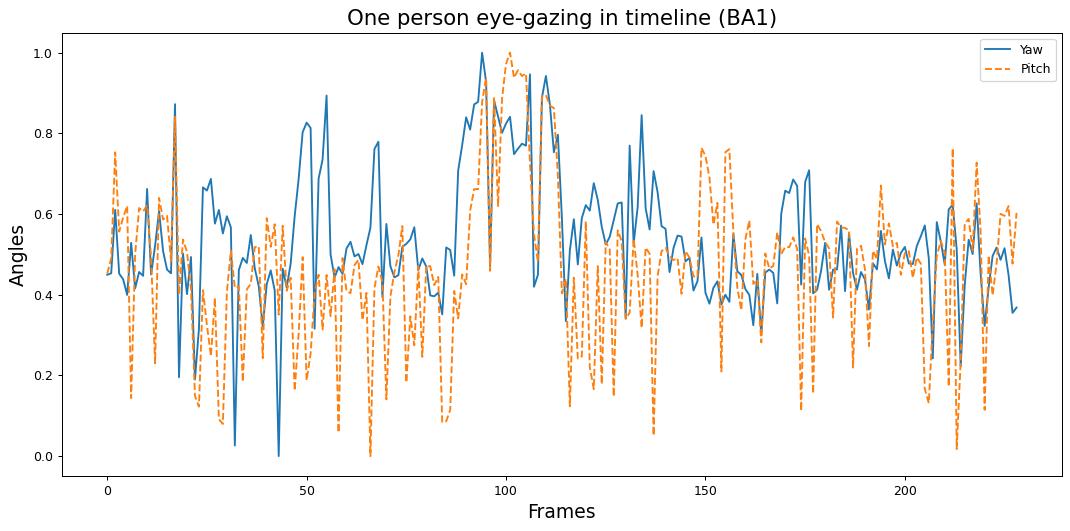

In [31]:
plt.figure(figsize=(12, 6), dpi=90)
# line 1 points
# plotting the line 1 points 
plt.plot(list(range(0, len(df_pichyaw_eyegaze_persion['norm_yaw']))), df_pichyaw_eyegaze_persion['norm_yaw'],label = "Yaw")

# plotting the line 2 points 
plt.plot(list(range(0, len(df_pichyaw_eyegaze_persion['norm_pitch']))), df_pichyaw_eyegaze_persion['norm_pitch'], '--', label = "Pitch")
plt.xlabel('Frames', fontsize=15)

# Set the y axis label of the current axis.
plt.ylabel('Angles', fontsize=15)
# Set a title of the current axes.
plt.title('One person eye-gazing in timeline (BA1)', fontsize=17)
# show a legend on the plot
plt.legend()

# plt.savefig('df_pichyaw_eyegaze_persion_ABA.jpg',bbox_inches='tight')
plt.savefig('df_pichyaw_eyegaze_persion_BA1.jpg',bbox_inches='tight')
# Display a figure.
plt.show()